Predict your score with information on number of hours slept and studied before the exam.

In [1]:
import numpy as np

In [2]:
from matplotlib.pyplot import *

In [3]:
x = np.array(([3,5],[5,1],[10,2]), dtype=float)
y = np.array(([75],[82],[93]), dtype=float)

In [4]:
x

array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  2.]])

In [5]:
y

array([[75.],
       [82.],
       [93.]])

In [6]:
x = x/np.amax(x, axis=0)
y = y/100 #Max test score is 100

In [7]:
x

array([[0.3, 1. ],
       [0.5, 0.2],
       [1. , 0.4]])

In [8]:
y

array([[0.75],
       [0.82],
       [0.93]])

In [9]:
def sigmoid(z):
    #Apply sigmoid activation function
    return 1/(1+np.exp(-z))

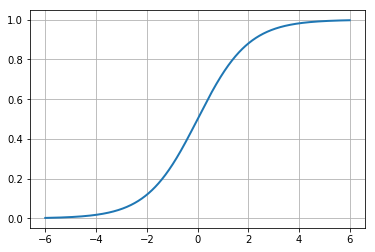

In [10]:
testInput = np.arange(-6,6,0.01)
plot(testInput, sigmoid(testInput), linewidth=2)
grid(1)

In [11]:
#Define the structure of neural network
class Neural_Network(object):
    def __init__(self):
        #define hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #weights (Parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
    
    def forward(self,x):
        #propagate input through network
        self.z2 = np.dot(x, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply sigmoid activation function
        return 1/(1+np.exp(-z))
    
    #Batch gradient descent

    def sigmoidPrime(self, z):
        #Derivative of sigmoid function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, x, y):
        #Compute cost for given x,y, use weights already stored in class.
        self.yHat = self.forward(x)
        J = 0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, x, y):
        #Compute derivative with respect to W1 and W2
        self.yHat = self.forward(x)

        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3) #∂J/∂W

        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(x.T, delta2)

        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, x, y):
        dJdW1, dJdW2 = self.costFunctionPrime(x, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [12]:
NN = Neural_Network()
yHat = NN.forward(x)

In [13]:
yHat

array([[0.80941386],
       [0.68589449],
       [0.6279519 ]])

In [14]:
y

array([[0.75],
       [0.82],
       [0.93]])

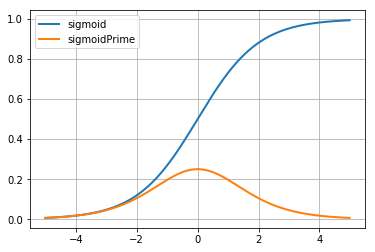

In [15]:
testValues = np.arange(-5,5,0.01)
plot(testValues, sigmoid(testValues), linewidth=2)
plot(testValues, NN.sigmoidPrime(testValues), linewidth=2)
grid(1)
legend(['sigmoid', 'sigmoidPrime'])

In [16]:
NN = Neural_Network()
cost1 = NN.costFunctionPrime(x,y)

In [17]:
dJdW1, dJdW2 = NN.costFunctionPrime(x,y)

In [18]:
print dJdW1, dJdW2

[[-0.01300504  0.01068142  0.04813189]
 [-0.0107413   0.00712862  0.03623089]] [[-0.10582224]
 [-0.06615024]
 [-0.13853343]]


In [19]:
# Step down hill
scalar = 3
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost2 = NN.costFunction(x,y)
print cost2

[0.18372341]


In [20]:
# Now to verify if gradient descent is working as intented, a small unit function to numerically check gradient descent
def computeNumericalGradient(N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        N.setParams(paramsInitial)

        return numgrad

In [21]:
numgrad = computeNumericalGradient(NN, x, y)
grad = NN.computeGradients(x, y)


In [22]:
numgrad

array([-0.02239464,  0.00351624,  0.02259145, -0.01712943,  0.00221757,
        0.01594669, -0.0874143 , -0.0531742 , -0.10426291])

In [23]:
grad

array([-0.02239464,  0.00351624,  0.02259145, -0.01712943,  0.00221757,
        0.01594669, -0.0874143 , -0.0531742 , -0.10426291])

In [24]:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad) #This verifies that our gradient descent is working with high accuracy

8.223526099135405e-11

In [25]:
# To overcome shortcomings of plain gradient descent we use optimization
#Here lets take BFGS Quasi-Newton optimization (More informed movements down hill)
from scipy import optimize

In [26]:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.x, self.y))   
        
    def costFunctionWrapper(self, params, x, y):
        self.N.setParams(params)
        cost = self.N.costFunction(x, y)
        grad = self.N.computeGradients(x,y)
        
        return cost, grad
        
    def train(self, x, y):
        #Make an internal variable for the callback function:
        self.x = x
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(x, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [27]:
NN = Neural_Network()
T = trainer(NN)

In [28]:
T.train(x,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 29
         Function evaluations: 34
         Gradient evaluations: 34


Text(0.5,0,'Iterations')

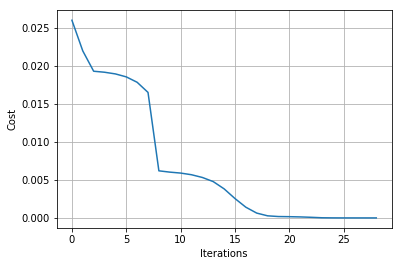

In [29]:
plot(T.J)
grid(1)
ylabel('Cost')
xlabel('Iterations')

In [30]:
NN.costFunctionPrime(x,y)

(array([[ 2.12107428e-14,  3.23322037e-09, -3.05662669e-06],
        [ 7.07020737e-14,  9.19025200e-09, -3.08596962e-06]]),
 array([[4.07339476e-06],
        [2.71892481e-06],
        [1.21037732e-06]]))

Text(0,0.5,'Actual')

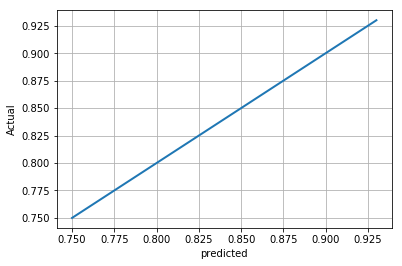

In [31]:
#Now that the model is trained
plot(NN.forward(x), y, linewidth=2)
grid(1)
xlabel('predicted')
ylabel('Actual')

In [32]:
#Test network for various combinations of sleep/study:
hoursSleep = np.linspace(0, 10, 100)
hoursStudy = np.linspace(0, 5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Create 2-d versions of input for plotting
a, b  = np.meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

Text(0,0.5,'Hours Study')

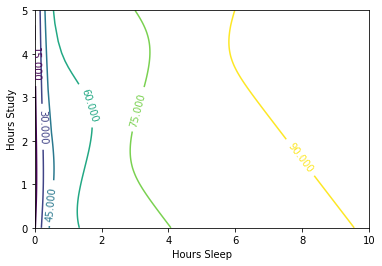

In [33]:
allOutputs = NN.forward(allInputs)
#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = contour(xx,yy,100*allOutputs.reshape(100, 100))
clabel(CS, inline=1, fontsize=10)
xlabel('Hours Sleep')
ylabel('Hours Study')

Text(0.5,0,'Test Score')

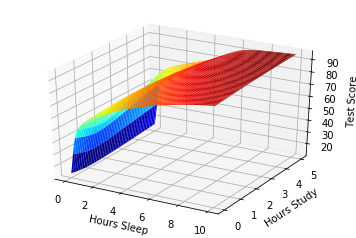

In [34]:
#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), cmap=cm.jet)

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')

In [35]:
# THE ABOVE NETWORK IS OVERFITTING!!!
#Now to evade overfitting apply regularization (So our model doesn't exactly fit the data)
#Training Data:
trainX = np.array(([3,5], [5,1], [10,2], [6,1.5]), dtype=float)
trainY = np.array(([75], [82], [93], [70]), dtype=float)

#Testing Data:
testX = np.array(([4, 5.5], [4.5,1], [9,2.5], [6, 2]), dtype=float)
testY = np.array(([70], [89], [85], [75]), dtype=float)

#Normalize:
trainX = trainX/np.amax(trainX, axis=0)
trainY = trainY/100 #Max test score is 100

#Normalize by max of training data:
testX = testX/np.amax(trainX, axis=0)
testY = testY/100 #Max test score is 100

In [36]:
##Need to modify trainer class a bit to check testing error during training:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        self.testJ.append(self.N.costFunction(self.testX, self.testY))
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, trainX, trainY, testX, testY):
        #Make an internal variable for the callback function:
        self.X = trainX
        self.y = trainY
        
        self.testX = testX
        self.testY = testY

        #Make empty list to store training costs:
        self.J = []
        self.testJ = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(trainX, trainY), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [37]:
#Train network with new data:
NN = Neural_Network()

T = trainer(NN)
T.train(trainX, trainY, testX, testY)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 169
         Function evaluations: 194
         Gradient evaluations: 194


Text(0,0.5,'Cost')

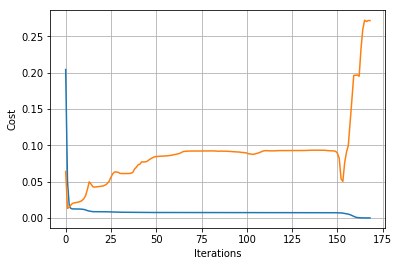

In [38]:
#Plot cost during training:
plot(T.J)
plot(T.testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')
#As you can see, as the iterations grow there is a huge disparity in cost

In [39]:
#Regularization Parameter:
Lambda = 0.0001

In [40]:
#New complete class, with changes:
class Neural_Network(object):
    def __init__(self, Lambda=0):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        #Regularization Parameter:
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        
        return dJdW1, dJdW2
    
    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [41]:
NN = Neural_Network(Lambda=0.0001)
#Make sure our gradients our correct after making changes:
numgrad = computeNumericalGradient(NN, x, y)
grad = NN.computeGradients(x,y)

In [42]:
#Should be less than 1e-8:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

2.637308195187666e-10

In [43]:
T = trainer(NN)
T.train(x,y,testX,testY)

Optimization terminated successfully.
         Current function value: 0.000814
         Iterations: 60
         Function evaluations: 64
         Gradient evaluations: 64


Text(0,0.5,'Cost')

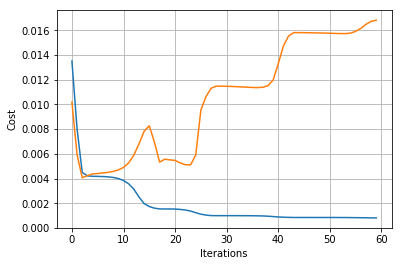

In [44]:
plot(T.J)
plot(T.testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')

Text(0,0.5,'Hours Study')

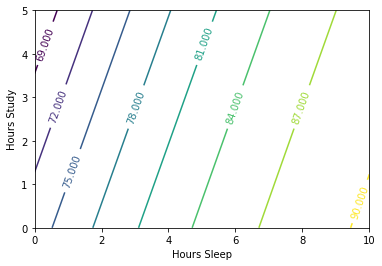

In [45]:
allOutputs = NN.forward(allInputs)

#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = contour(xx,yy,100*allOutputs.reshape(100, 100))
clabel(CS, inline=1, fontsize=10)
xlabel('Hours Sleep')
ylabel('Hours Study')

Text(0.5,0,'Test Score')

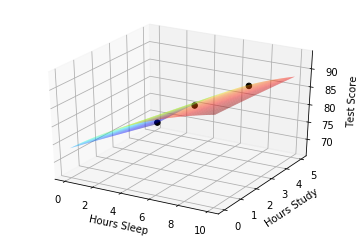

In [46]:
#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = figure()
ax = fig.gca(projection='3d')

ax.scatter(10*x[:,0], 5*x[:,1], 100*y, c='k', alpha = 1, s=30)


surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet, alpha = 0.5)

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')